# List 8


In [47]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import metrics
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import linear_model
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

from perceptron import Perceptron
from adalineGD import AdalineGD
from adalineSGD import AdalineSGD

## Read Data


In [2]:
df = pd.read_csv('../datasets/pima-indians-diabetes.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.corrwith(df[8])

0    0.221898
1    0.466581
2    0.065068
3    0.074752
4    0.130548
5    0.292695
6    0.173844
7    0.238356
8    1.000000
dtype: float64

In [5]:
X = df[[1, 5]] # 2 atributo de maior correlacao
y = df[8]

In [6]:
X = np.array(X)
X

array([[148. ,  33.6],
       [ 85. ,  26.6],
       [183. ,  23.3],
       ...,
       [121. ,  26.2],
       [126. ,  30.1],
       [ 93. ,  30.4]])

In [7]:
scaler = StandardScaler().fit(X)

In [8]:
Xtransf = scaler.transform(X)

## Decision Regions

In [9]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    plt.xlabel('features')
    plt.ylabel('label')
    plt.legend(loc='upper left')
    plt.show()

In [10]:
def plot_updates(model):
    try:
        plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
    except: 
        plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Number of updates')
    plt.tight_layout()
    plt.show()


## Perceptron

In [11]:
ppn = Perceptron(eta=0.1, n_iter=10)

In [13]:
ppn.fit(Xtransf, y)

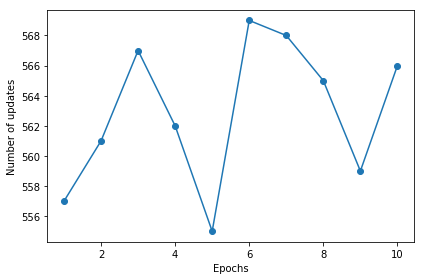

In [14]:
plot_updates(ppn)

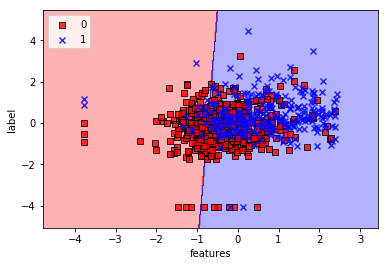

In [16]:
plot_decision_regions(Xtransf, y, classifier=ppn)

## Adaline GD

In [18]:
ada = AdalineGD(n_iter=15, eta=0.01)

In [19]:
ada.fit(Xtransf, y)

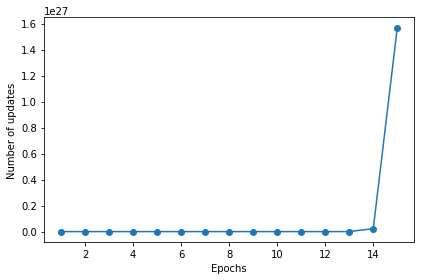

In [20]:
plot_updates(ada)

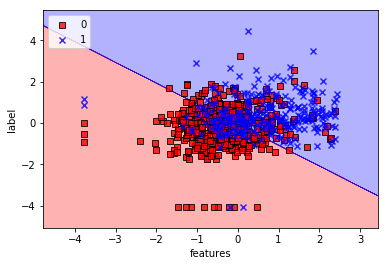

In [21]:
plot_decision_regions(Xtransf, y, classifier=ada)

## Adaline SGD

In [22]:
adas = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
adas.fit(Xtransf, y)

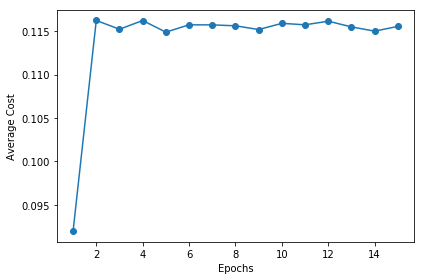

In [23]:
plt.plot(range(1, len(adas.cost_) + 1), adas.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
plt.show()

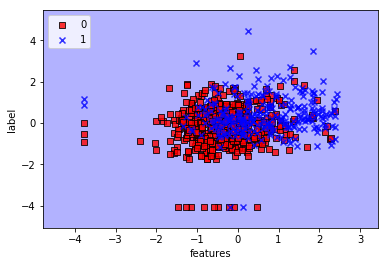

In [25]:
plot_decision_regions(Xtransf, y, classifier=adas)

## KFolds

In [115]:
skfold = StratifiedKFold(n_splits=3)

In [116]:
accs = []

In [117]:
def show_accs(X, y, model, skfold=skfold):
    accs = 0.0
    for idx_train, idx_test in skfold.split(X, y):
        Xtrain = X[idx_train]
        Xtest = X[idx_test]
        y_train = y[idx_train]
        y_test = y[idx_test]
        
        scaler = StandardScaler().fit(Xtrain)
        Xtrain_transf = scaler.transform(Xtrain)
        Xtest_transf = scaler.transform(Xtest)
        
        model.fit(Xtrain_transf, y_train)
        y_pred = model.predict(Xtest_transf)
        
        accs += metrics.accuracy_score(y_test, y_pred)
    print (accs/3)
    return accs/3

## Perceptron

In [118]:
ppn = Perceptron(eta=0.1, n_iter=10)

In [119]:
accs.append(show_accs(X, y, ppn))

0.25103459347422497


## Adaline GD

In [120]:
ada = AdalineGD(n_iter=15, eta=0.01)

In [121]:
accs.append(show_accs(X, y, ada))

0.27344542753871975


## Adaline SGD

In [122]:
adas = AdalineSGD(n_iter=15, eta=0.01, random_state=1)

In [123]:
try: 
    accs.append(show_accs(X, y, adas))
except: 
    accs.append(0)

/home/unknown/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/home/unknown/github/machine-learning/library/adalineSGD.py:106: RuntimeWarning: invalid value encountered in greater_equal
  return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


0.0


## Logistic Regression


In [124]:
lr_model = linear_model.LogisticRegression()

In [125]:
accs.append(show_accs(X=X, y=y, model=lr_model))

0.7643307051257597


## kNN

In [126]:
knn_model = neighbors.KNeighborsRegressor()

In [127]:
try: 
    accs.append(show_accs(X, y, knn_model)); 
except: 
    accs.append(0)


## Naive Bayes 

In [128]:
nb_model = naive_bayes.GaussianNB()

In [129]:
accs.append(show_accs(X, y, nb_model))

0.7578354878754355



## SVM 


In [130]:
svm_model = svm.SVR()

In [131]:
try: 
    accs.append(show_accs(X, y, svm_model))
except: 
    accs.append(0)

In [132]:
accs = np.array(accs)
accs

array([0.25103459, 0.27344543, 0.        , 0.76433071, 0.        ,
       0.75783549, 0.        ])

([<matplotlib.axis.XTick at 0x7f242aeb2c88>,
 <a list of 7 Text xticklabel objects>)

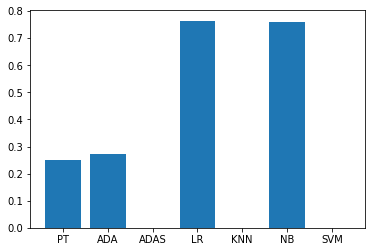

In [133]:
class_names = np.array(['PT', 'ADA', 'ADAS', 'LR','KNN','NB','SVM'])
plt.bar(range(len(accs)), accs)
plt.xticks(range(len(accs)), class_names)